In [20]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import kaleido
import imageio

## Load Data for fertility, population, life expectancy from different files and file types in dataframes

In [3]:
df_continents = pd.read_csv('./data/continents.csv', index_col=1, delimiter=";")
df_fert = pd.read_csv('./data/gapminder_total_fertility.csv', index_col=0, delimiter=",")
df_pop = pd.read_excel('./data/gapminder_population.xlsx', index_col=0)
df_life = pd.read_excel('./data/gapminder_lifeexpectancy.xlsx', index_col=0)

### Drop NAs from dataframes

<AxesSubplot:ylabel='Total fertility rate'>

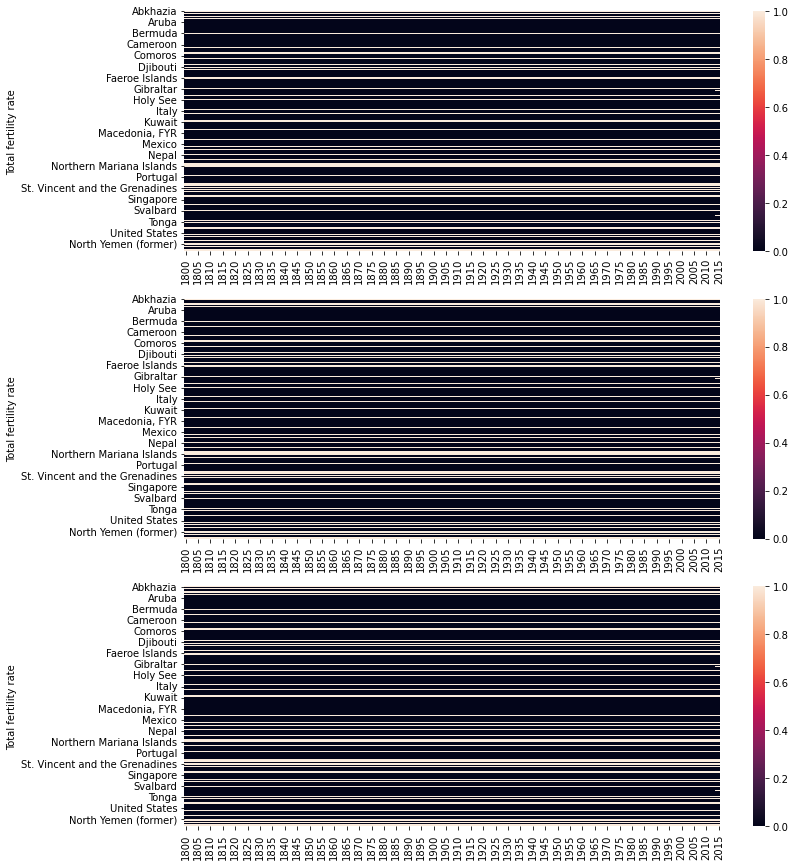

In [4]:
fig, ax = plt.subplots(3,1,figsize=(12,15))
sns.heatmap(ax=ax[0],data=df_fert.isna())
sns.heatmap(ax=ax[1],data=df_fert.isna())
sns.heatmap(ax=ax[2],data=df_fert.isna())

In [5]:
df_fert.dropna(inplace=True)
df_pop.dropna(inplace=True)
df_life.dropna(inplace=True)

<AxesSubplot:ylabel='Total fertility rate'>

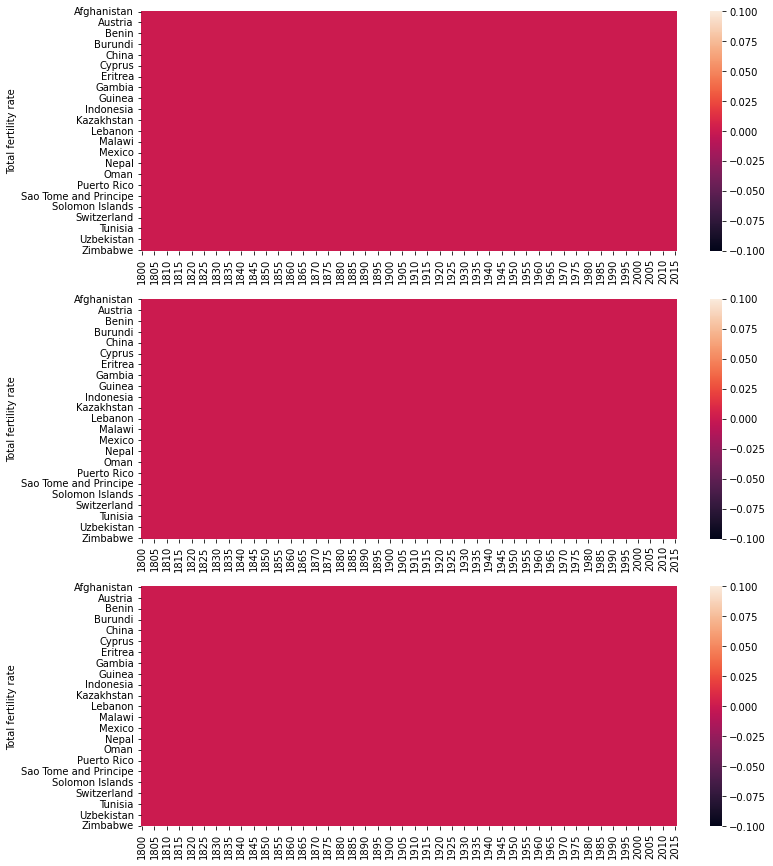

In [5]:
fig, ax = plt.subplots(3,1,figsize=(12,15))
sns.heatmap(ax=ax[0],data=df_fert.isna())
sns.heatmap(ax=ax[1],data=df_fert.isna())
sns.heatmap(ax=ax[2],data=df_fert.isna())

### Transform Column names to int

In [6]:
df_life.columns =df_life.columns.astype(int)
df_pop.columns = df_pop.columns.astype(int)
df_fert.columns = df_fert.columns.astype(int)

In [7]:
df_pop.index.name="country"
df_fert.index.name="country"
df_life.index.name ="country"

In [8]:
df_pop.reset_index(inplace=True)
df_life.reset_index(inplace=True)
df_fert.reset_index(inplace=True)

### Melt Data frames with double indexes

In [9]:
df_pop = df_pop.melt(id_vars='country', var_name='year', value_name='population')
df_fert = df_fert.melt(id_vars="country",var_name="year",value_name="fertility")
df_life = df_life.melt(id_vars="country",var_name="year",value_name="life_expectancy")

### Merge Data frames by indexes

In [10]:
df1 = pd.merge(df_pop,df_fert,how="inner",on=['country','year'])
df2 = pd.merge(df1,df_life,how="inner",on=['country','year'])
df3 = pd.merge(df2,df_continents,how="inner",on="country")

In [11]:
liste=df3.columns

In [12]:
x_lim=(15,90)
y_lim=(0,df3[liste[3]].max()*1.1)

### Write png's for every year in subfolder

In [13]:
def save_plots():
    plt.figure(figsize=(12,8))
    years=df3[liste[1]].unique()
    for year in years:
        df= df3[df3["year"]==year]
        fig= px.scatter(df,x=liste[4],y=liste[3],
                        color=liste[5],size=df[liste[2]]**(1/3), 
                        hover_name=liste[0],title=str(year),
                        range_x=x_lim,range_y=y_lim,
                        opacity=.5)
        fig.write_image("figure/plot"+str(year)+".png")
save_plots()

<Figure size 864x576 with 0 Axes>

### Create an animated Gif

In [14]:
def create_gif():
    images = []
    years=df3[liste[1]].unique()
    for year in years:
        filename = "figure/plot"+str(year)+".png"
        images.append(imageio.imread(filename))
    imageio.mimsave('output.gif', images, fps=10)
create_gif()

### Interactiv plot with widgets and move over information

In [27]:
init_notebook_mode(connected=True)
cb=[]
cb_string=[]
years=df3[liste[1]].unique()
x=widgets.IntSlider(min=0, max=len(years)-1, step=1, value=0)
continents= df3[liste[5]].unique()
for continent in continents:
    cb.append(widgets.Checkbox(True,description=continent))
    cb_string.append(continent)
ui1 = widgets.HBox(cb[0:3])
ui2 = widgets.HBox(cb[3:6])
cb_dict = dict(zip(cb_string,cb))
cb_dict["x"]=x
years=df3[liste[1]].unique()
def inter(x,**cb):
    year=years[x]
    df= df3[df3["year"]==year]
    df = df[df["continent"].map(cb)]
    fig=px.scatter(df,x=liste[4],y=liste[3],
                    color=liste[5],size=df[liste[2]]**(1/3), 
                    hover_name=liste[0],hover_data=[liste[2]],title=str(year),
                    range_x=x_lim,range_y=y_lim,
                    opacity=.5) 
    fig.show()
    return
out = widgets.interactive_output(inter, cb_dict)
display(ui1,ui2,out,x)

Output()

IntSlider(value=0, max=80)